In [1]:
from sympy import *
from collections import deque
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

init_printing(use_unicode=True)

In [2]:
number_lines = 10

vs, io, za, zb, reflection = symbols('V_S I_o Z_L Z_C Gamma')

io = vs/(za+zb)
reflection = (za - zb)/(za + zb)

AA_v = (-reflection)
AA_i = reflection
AA = Matrix([AA_v,AA_i])

AB_v = (-(1-reflection))
AB_i = (1+reflection)
AB = Matrix([AB_v,AB_i])

BA_v = -(1+reflection)
BA_i = (1-reflection)
BA = Matrix([BA_v,BA_i])

BB_v = (reflection)
BB_i = -(reflection)
BB = Matrix([BB_v,BB_i])

SC = Matrix([-1,1])
OC = Matrix([1,-1])

In [3]:
def reflect_self_A(m):
    return simplify(expand(matrix_multiply_elementwise(m,SC)))

def reflect_self_B(m):
    return simplify(expand(matrix_multiply_elementwise(m,OC)))

def reflect_AA(m):
    return simplify(expand(matrix_multiply_elementwise(m,AA)))

def reflect_AB(m):
    return simplify(expand(matrix_multiply_elementwise(m,AB)))

def reflect_BA(m):
    return simplify(expand(matrix_multiply_elementwise(m,BA)))

def reflect_BB(m):
    return simplify(expand(matrix_multiply_elementwise(m,BB)))

In [4]:
a_i = Matrix([za*io,io])
b_i = Matrix([zb*io,io])

In [5]:
fan_out_rows = [[a_i, b_i]]

for i in range(1,number_lines):

    # Generate Self Reflected Wavefronts

    self_reflect_wavefronts = []
    most_recent_row = fan_out_rows[-1]
    is_A = True

    for wavefront in most_recent_row:

        if(is_A):
            temp_wavefront = reflect_self_A(wavefront)
            is_A = False
        else:
            temp_wavefront = reflect_self_B(wavefront)
            is_A = True
        
        self_reflect_wavefronts.append(temp_wavefront)

    fan_out_rows.append(self_reflect_wavefronts)

    # Generate New Wavefronts
    generated_wavefronts = deque()
    merged_wavefronts = []
    most_recent_row = fan_out_rows[-1]
    is_A = True

    for wavefront in most_recent_row:
        if(is_A):
            temp_wavefront_A = reflect_AA(wavefront)
            temp_wavefront_B = reflect_AB(wavefront)
            is_A = False
        else:
            temp_wavefront_A = reflect_BA(wavefront)
            temp_wavefront_B = reflect_BB(wavefront)
            is_A = True

        generated_wavefronts.append(temp_wavefront_A)
        generated_wavefronts.append(temp_wavefront_B)

    is_First_Wavefronts = True
    while len(generated_wavefronts) > 0:

        wavefront_A =  generated_wavefronts.popleft()
        wavefront_B =  generated_wavefronts.popleft()

        if(is_First_Wavefronts):
            merged_wavefronts.append(wavefront_A)
            merged_wavefronts.append(wavefront_B)
            is_First_Wavefronts = False

        elif(len(generated_wavefronts)==0):
            merged_wavefronts.append(wavefront_A)
            merged_wavefronts.append(wavefront_B)

        else:
            wavefront_A2 = generated_wavefronts.popleft()
            wavefront_B2 = generated_wavefronts.popleft()

            wavefront_A = simplify(expand(wavefront_A + wavefront_A2))
            wavefront_B = simplify(expand(wavefront_B + wavefront_B2))

            merged_wavefronts.append(wavefront_A)
            merged_wavefronts.append(wavefront_B)

    fan_out_rows.append(list(merged_wavefronts))


In [6]:
fan_out_rows[0]

⎡⎡ V_S⋅Z_L ⎤  ⎡ V_S⋅Z_C ⎤⎤
⎢⎢─────────⎥  ⎢─────────⎥⎥
⎢⎢Z_C + Z_L⎥  ⎢Z_C + Z_L⎥⎥
⎢⎢         ⎥, ⎢         ⎥⎥
⎢⎢   V_S   ⎥  ⎢   V_S   ⎥⎥
⎢⎢─────────⎥  ⎢─────────⎥⎥
⎣⎣Z_C + Z_L⎦  ⎣Z_C + Z_L⎦⎦

In [7]:
fan_out_rows[1]

⎡⎡-V_S⋅Z_L ⎤  ⎡ V_S⋅Z_C ⎤⎤
⎢⎢─────────⎥  ⎢─────────⎥⎥
⎢⎢Z_C + Z_L⎥  ⎢Z_C + Z_L⎥⎥
⎢⎢         ⎥, ⎢         ⎥⎥
⎢⎢   V_S   ⎥  ⎢  -V_S   ⎥⎥
⎢⎢─────────⎥  ⎢─────────⎥⎥
⎣⎣Z_C + Z_L⎦  ⎣Z_C + Z_L⎦⎦

In [8]:
fan_out_rows[2]

⎡⎡  V_S⋅Z_L⋅(-Z_C + Z_L) ⎤  ⎡     2⋅V_S⋅Z_C⋅Z_L     ⎤  ⎡    -2⋅V_S⋅Z_C⋅Z_L    
⎢⎢───────────────────────⎥  ⎢───────────────────────⎥  ⎢──────────────────────
⎢⎢   2                  2⎥  ⎢   2                  2⎥  ⎢   2                  
⎢⎢Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎥  ⎢Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎥  ⎢Z_C  + 2⋅Z_C⋅Z_L + Z_L
⎢⎢                       ⎥, ⎢                       ⎥, ⎢                      
⎢⎢    V_S⋅(-Z_C + Z_L)   ⎥  ⎢       2⋅V_S⋅Z_L       ⎥  ⎢      -2⋅V_S⋅Z_C      
⎢⎢───────────────────────⎥  ⎢───────────────────────⎥  ⎢──────────────────────
⎢⎢   2                  2⎥  ⎢   2                  2⎥  ⎢   2                  
⎣⎣Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎦  ⎣Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎦  ⎣Z_C  + 2⋅Z_C⋅Z_L + Z_L

 ⎤  ⎡  V_S⋅Z_C⋅(-Z_C + Z_L) ⎤⎤
─⎥  ⎢───────────────────────⎥⎥
2⎥  ⎢   2                  2⎥⎥
 ⎥  ⎢Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎥⎥
 ⎥, ⎢                       ⎥⎥
 ⎥  ⎢    V_S⋅(-Z_C + Z_L)   ⎥⎥
─⎥  ⎢───────────────────────⎥⎥
2⎥  ⎢   2                  2⎥⎥
 ⎦  ⎣Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎦⎦

In [9]:
fan_out_rows[3]

⎡⎡  V_S⋅Z_L⋅(Z_C - Z_L)  ⎤  ⎡     2⋅V_S⋅Z_C⋅Z_L     ⎤  ⎡     2⋅V_S⋅Z_C⋅Z_L    
⎢⎢───────────────────────⎥  ⎢───────────────────────⎥  ⎢──────────────────────
⎢⎢   2                  2⎥  ⎢   2                  2⎥  ⎢   2                  
⎢⎢Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎥  ⎢Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎥  ⎢Z_C  + 2⋅Z_C⋅Z_L + Z_L
⎢⎢                       ⎥, ⎢                       ⎥, ⎢                      
⎢⎢    V_S⋅(-Z_C + Z_L)   ⎥  ⎢      -2⋅V_S⋅Z_L       ⎥  ⎢      -2⋅V_S⋅Z_C      
⎢⎢───────────────────────⎥  ⎢───────────────────────⎥  ⎢──────────────────────
⎢⎢   2                  2⎥  ⎢   2                  2⎥  ⎢   2                  
⎣⎣Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎦  ⎣Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎦  ⎣Z_C  + 2⋅Z_C⋅Z_L + Z_L

 ⎤  ⎡  V_S⋅Z_C⋅(-Z_C + Z_L) ⎤⎤
─⎥  ⎢───────────────────────⎥⎥
2⎥  ⎢   2                  2⎥⎥
 ⎥  ⎢Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎥⎥
 ⎥, ⎢                       ⎥⎥
 ⎥  ⎢    V_S⋅(Z_C - Z_L)    ⎥⎥
─⎥  ⎢───────────────────────⎥⎥
2⎥  ⎢   2                  2⎥⎥
 ⎦  ⎣Z_C  + 2⋅Z_C⋅Z_L + Z_L ⎦⎦

In [10]:
fan_out_rows[4]

⎡⎡          ⎛   2                  2⎞  ⎤                                      
⎢⎢  V_S⋅Z_L⋅⎝Z_C  - 2⋅Z_C⋅Z_L + Z_L ⎠  ⎥  ⎡      2⋅V_S⋅Z_C⋅Z_L⋅(-Z_C + Z_L)   
⎢⎢─────────────────────────────────────⎥  ⎢───────────────────────────────────
⎢⎢   3        2                2      3⎥  ⎢   3        2                2     
⎢⎢Z_C  + 3⋅Z_C ⋅Z_L + 3⋅Z_C⋅Z_L  + Z_L ⎥  ⎢Z_C  + 3⋅Z_C ⋅Z_L + 3⋅Z_C⋅Z_L  + Z_
⎢⎢                                     ⎥, ⎢                                   
⎢⎢        ⎛   2                  2⎞    ⎥  ⎢        2⋅V_S⋅Z_L⋅(-Z_C + Z_L)     
⎢⎢    V_S⋅⎝Z_C  - 2⋅Z_C⋅Z_L + Z_L ⎠    ⎥  ⎢───────────────────────────────────
⎢⎢─────────────────────────────────────⎥  ⎢   3        2                2     
⎢⎢   3        2                2      3⎥  ⎣Z_C  + 3⋅Z_C ⋅Z_L + 3⋅Z_C⋅Z_L  + Z_
⎣⎣Z_C  + 3⋅Z_C ⋅Z_L + 3⋅Z_C⋅Z_L  + Z_L ⎦                                      

                                                                              
  ⎤  ⎡     2⋅V_S⋅Z_C⋅Z_L⋅(Z_C - 3⋅Z_L)     ⎤  ⎡    

In [11]:
fan_out_rows[5]

⎡⎡         ⎛     2                  2⎞ ⎤                                      
⎢⎢ V_S⋅Z_L⋅⎝- Z_C  + 2⋅Z_C⋅Z_L - Z_L ⎠ ⎥  ⎡      2⋅V_S⋅Z_C⋅Z_L⋅(-Z_C + Z_L)   
⎢⎢─────────────────────────────────────⎥  ⎢───────────────────────────────────
⎢⎢   3        2                2      3⎥  ⎢   3        2                2     
⎢⎢Z_C  + 3⋅Z_C ⋅Z_L + 3⋅Z_C⋅Z_L  + Z_L ⎥  ⎢Z_C  + 3⋅Z_C ⋅Z_L + 3⋅Z_C⋅Z_L  + Z_
⎢⎢                                     ⎥, ⎢                                   
⎢⎢        ⎛   2                  2⎞    ⎥  ⎢        2⋅V_S⋅Z_L⋅(Z_C - Z_L)      
⎢⎢    V_S⋅⎝Z_C  - 2⋅Z_C⋅Z_L + Z_L ⎠    ⎥  ⎢───────────────────────────────────
⎢⎢─────────────────────────────────────⎥  ⎢   3        2                2     
⎢⎢   3        2                2      3⎥  ⎣Z_C  + 3⋅Z_C ⋅Z_L + 3⋅Z_C⋅Z_L  + Z_
⎣⎣Z_C  + 3⋅Z_C ⋅Z_L + 3⋅Z_C⋅Z_L  + Z_L ⎦                                      

                                                                              
  ⎤  ⎡     2⋅V_S⋅Z_C⋅Z_L⋅(-Z_C + 3⋅Z_L)    ⎤  ⎡    

In [12]:
fan_out_rows[6]

⎡⎡         ⎛     3        2                2      3⎞ ⎤  ⎡                    ⎛
⎢⎢ V_S⋅Z_L⋅⎝- Z_C  + 3⋅Z_C ⋅Z_L - 3⋅Z_C⋅Z_L  + Z_L ⎠ ⎥  ⎢      2⋅V_S⋅Z_C⋅Z_L⋅⎝
⎢⎢───────────────────────────────────────────────────⎥  ⎢─────────────────────
⎢⎢   4        3            2    2            3      4⎥  ⎢   4        3        
⎢⎢Z_C  + 4⋅Z_C ⋅Z_L + 6⋅Z_C ⋅Z_L  + 4⋅Z_C⋅Z_L  + Z_L ⎥  ⎢Z_C  + 4⋅Z_C ⋅Z_L + 6
⎢⎢                                                   ⎥, ⎢                     
⎢⎢       ⎛     3        2                2      3⎞   ⎥  ⎢                  ⎛  
⎢⎢   V_S⋅⎝- Z_C  + 3⋅Z_C ⋅Z_L - 3⋅Z_C⋅Z_L  + Z_L ⎠   ⎥  ⎢        2⋅V_S⋅Z_L⋅⎝Z_
⎢⎢───────────────────────────────────────────────────⎥  ⎢─────────────────────
⎢⎢   4        3            2    2            3      4⎥  ⎢   4        3        
⎣⎣Z_C  + 4⋅Z_C ⋅Z_L + 6⋅Z_C ⋅Z_L  + 4⋅Z_C⋅Z_L  + Z_L ⎦  ⎣Z_C  + 4⋅Z_C ⋅Z_L + 6

   2                  2⎞      ⎤  ⎡                  ⎛     2                   
Z_C  - 2⋅Z_C⋅Z_L + Z_L ⎠      ⎥  ⎢    2⋅V_S⋅Z_C⋅Z_L

In [13]:
fan_out_rows[7]

⎡⎡          ⎛   3        2                2      3⎞  ⎤  ⎡                    ⎛
⎢⎢  V_S⋅Z_L⋅⎝Z_C  - 3⋅Z_C ⋅Z_L + 3⋅Z_C⋅Z_L  - Z_L ⎠  ⎥  ⎢      2⋅V_S⋅Z_C⋅Z_L⋅⎝
⎢⎢───────────────────────────────────────────────────⎥  ⎢─────────────────────
⎢⎢   4        3            2    2            3      4⎥  ⎢   4        3        
⎢⎢Z_C  + 4⋅Z_C ⋅Z_L + 6⋅Z_C ⋅Z_L  + 4⋅Z_C⋅Z_L  + Z_L ⎥  ⎢Z_C  + 4⋅Z_C ⋅Z_L + 6
⎢⎢                                                   ⎥, ⎢                     
⎢⎢       ⎛     3        2                2      3⎞   ⎥  ⎢                 ⎛   
⎢⎢   V_S⋅⎝- Z_C  + 3⋅Z_C ⋅Z_L - 3⋅Z_C⋅Z_L  + Z_L ⎠   ⎥  ⎢       2⋅V_S⋅Z_L⋅⎝- Z
⎢⎢───────────────────────────────────────────────────⎥  ⎢─────────────────────
⎢⎢   4        3            2    2            3      4⎥  ⎢   4        3        
⎣⎣Z_C  + 4⋅Z_C ⋅Z_L + 6⋅Z_C ⋅Z_L  + 4⋅Z_C⋅Z_L  + Z_L ⎦  ⎣Z_C  + 4⋅Z_C ⋅Z_L + 6

   2                  2⎞      ⎤  ⎡                   ⎛   2                    
Z_C  - 2⋅Z_C⋅Z_L + Z_L ⎠      ⎥  ⎢     2⋅V_S⋅Z_C⋅Z_

In [14]:
fan_out_rows[8]

⎡⎡           ⎛   4        3            2    2            3      4⎞   ⎤  ⎡     
⎢⎢   V_S⋅Z_L⋅⎝Z_C  - 4⋅Z_C ⋅Z_L + 6⋅Z_C ⋅Z_L  - 4⋅Z_C⋅Z_L  + Z_L ⎠   ⎥  ⎢     
⎢⎢───────────────────────────────────────────────────────────────────⎥  ⎢─────
⎢⎢   5        4             3    2         2    3            4      5⎥  ⎢   5 
⎢⎢Z_C  + 5⋅Z_C ⋅Z_L + 10⋅Z_C ⋅Z_L  + 10⋅Z_C ⋅Z_L  + 5⋅Z_C⋅Z_L  + Z_L ⎥  ⎢Z_C  
⎢⎢                                                                   ⎥, ⎢     
⎢⎢         ⎛   4        3            2    2            3      4⎞     ⎥  ⎢     
⎢⎢     V_S⋅⎝Z_C  - 4⋅Z_C ⋅Z_L + 6⋅Z_C ⋅Z_L  - 4⋅Z_C⋅Z_L  + Z_L ⎠     ⎥  ⎢     
⎢⎢───────────────────────────────────────────────────────────────────⎥  ⎢─────
⎢⎢   5        4             3    2         2    3            4      5⎥  ⎢   5 
⎣⎣Z_C  + 5⋅Z_C ⋅Z_L + 10⋅Z_C ⋅Z_L  + 10⋅Z_C ⋅Z_L  + 5⋅Z_C⋅Z_L  + Z_L ⎦  ⎣Z_C  

               ⎛     3        2                2      3⎞      ⎤  ⎡            
 2⋅V_S⋅Z_C⋅Z_L⋅⎝- Z_C  + 3⋅Z_C ⋅Z_L - 3⋅Z_C⋅Z_L  + 

In [15]:
fan_out_rows[9]

⎡⎡          ⎛     4        3            2    2            3      4⎞  ⎤  ⎡     
⎢⎢  V_S⋅Z_L⋅⎝- Z_C  + 4⋅Z_C ⋅Z_L - 6⋅Z_C ⋅Z_L  + 4⋅Z_C⋅Z_L  - Z_L ⎠  ⎥  ⎢     
⎢⎢───────────────────────────────────────────────────────────────────⎥  ⎢─────
⎢⎢   5        4             3    2         2    3            4      5⎥  ⎢   5 
⎢⎢Z_C  + 5⋅Z_C ⋅Z_L + 10⋅Z_C ⋅Z_L  + 10⋅Z_C ⋅Z_L  + 5⋅Z_C⋅Z_L  + Z_L ⎥  ⎢Z_C  
⎢⎢                                                                   ⎥, ⎢     
⎢⎢         ⎛   4        3            2    2            3      4⎞     ⎥  ⎢     
⎢⎢     V_S⋅⎝Z_C  - 4⋅Z_C ⋅Z_L + 6⋅Z_C ⋅Z_L  - 4⋅Z_C⋅Z_L  + Z_L ⎠     ⎥  ⎢     
⎢⎢───────────────────────────────────────────────────────────────────⎥  ⎢─────
⎢⎢   5        4             3    2         2    3            4      5⎥  ⎢   5 
⎣⎣Z_C  + 5⋅Z_C ⋅Z_L + 10⋅Z_C ⋅Z_L  + 10⋅Z_C ⋅Z_L  + 5⋅Z_C⋅Z_L  + Z_L ⎦  ⎣Z_C  

               ⎛     3        2                2      3⎞      ⎤  ⎡            
 2⋅V_S⋅Z_C⋅Z_L⋅⎝- Z_C  + 3⋅Z_C ⋅Z_L - 3⋅Z_C⋅Z_L  + 

In [16]:
fan_out_rows[10]

⎡⎡         ⎛     5        4             3    2         2    3            4    
⎢⎢ V_S⋅Z_L⋅⎝- Z_C  + 5⋅Z_C ⋅Z_L - 10⋅Z_C ⋅Z_L  + 10⋅Z_C ⋅Z_L  - 5⋅Z_C⋅Z_L  + Z
⎢⎢────────────────────────────────────────────────────────────────────────────
⎢⎢   6        5             4    2         3    3         2    4            5 
⎢⎢Z_C  + 6⋅Z_C ⋅Z_L + 15⋅Z_C ⋅Z_L  + 20⋅Z_C ⋅Z_L  + 15⋅Z_C ⋅Z_L  + 6⋅Z_C⋅Z_L  
⎢⎢                                                                            
⎢⎢       ⎛     5        4             3    2         2    3            4      
⎢⎢   V_S⋅⎝- Z_C  + 5⋅Z_C ⋅Z_L - 10⋅Z_C ⋅Z_L  + 10⋅Z_C ⋅Z_L  - 5⋅Z_C⋅Z_L  + Z_L
⎢⎢────────────────────────────────────────────────────────────────────────────
⎢⎢   6        5             4    2         3    3         2    4            5 
⎣⎣Z_C  + 6⋅Z_C ⋅Z_L + 15⋅Z_C ⋅Z_L  + 20⋅Z_C ⋅Z_L  + 15⋅Z_C ⋅Z_L  + 6⋅Z_C⋅Z_L  

  5⎞  ⎤  ⎡                     ⎛   4        3            2    2            3  
_L ⎠  ⎥  ⎢       2⋅V_S⋅Z_C⋅Z_L⋅⎝Z_C  - 4⋅Z_C ⋅Z_L +

In [17]:
fan_out_rows[18][8].subs([(vs,1),(za,10),(zb,1)])

⎡ 6187379580⎤
⎢───────────⎥
⎢25937424601⎥
⎢           ⎥
⎢ 618737958 ⎥
⎢───────────⎥
⎣25937424601⎦

In [18]:
print(latex(fan_out_rows[0][0][0]))

\frac{V_{S} Z_{L}}{Z_{C} + Z_{L}}


### Row 1

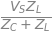

In [19]:
fan_out_rows[0][0][0]

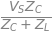

In [20]:
fan_out_rows[0][1][0]

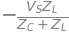

In [21]:
fan_out_rows[1][0][0]

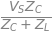

In [22]:
fan_out_rows[1][1][0]

### Row 2

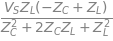

In [23]:
fan_out_rows[2][0][0]

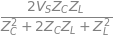

In [24]:
fan_out_rows[2][1][0]

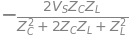

In [25]:
fan_out_rows[2][2][0]

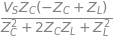

In [26]:
fan_out_rows[2][3][0]

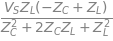

In [ ]:
fan_out_rows[3][0][0]

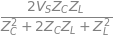

In [27]:
fan_out_rows[3][1][0]

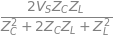

In [28]:
fan_out_rows[3][2][0]

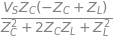

In [30]:
fan_out_rows[3][3][0]

### Row 3

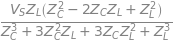

In [31]:
fan_out_rows[4][0][0]

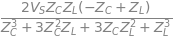

In [32]:
fan_out_rows[4][1][0]

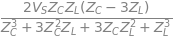

In [33]:
fan_out_rows[4][2][0]

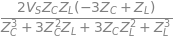

In [34]:
fan_out_rows[4][3][0]

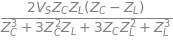

In [35]:
fan_out_rows[4][4][0]

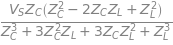

In [36]:
fan_out_rows[4][5][0]

### Row 8

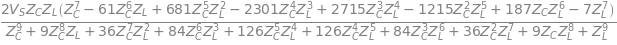

In [45]:
fan_out_rows[16][10][0]

In [46]:
print(latex(fan_out_rows[16][10][0]))

\frac{2 V_{S} Z_{C} Z_{L} \left(Z_{C}^{7} - 61 Z_{C}^{6} Z_{L} + 681 Z_{C}^{5} Z_{L}^{2} - 2301 Z_{C}^{4} Z_{L}^{3} + 2715 Z_{C}^{3} Z_{L}^{4} - 1215 Z_{C}^{2} Z_{L}^{5} + 187 Z_{C} Z_{L}^{6} - 7 Z_{L}^{7}\right)}{Z_{C}^{9} + 9 Z_{C}^{8} Z_{L} + 36 Z_{C}^{7} Z_{L}^{2} + 84 Z_{C}^{6} Z_{L}^{3} + 126 Z_{C}^{5} Z_{L}^{4} + 126 Z_{C}^{4} Z_{L}^{5} + 84 Z_{C}^{3} Z_{L}^{6} + 36 Z_{C}^{2} Z_{L}^{7} + 9 Z_{C} Z_{L}^{8} + Z_{L}^{9}}
